In [492]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

df = pd.read_csv('titanic-passengers.csv',encoding="ISO-8859-1",delimiter=';')
df.head(40)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""""Mary"""")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [493]:
#show information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


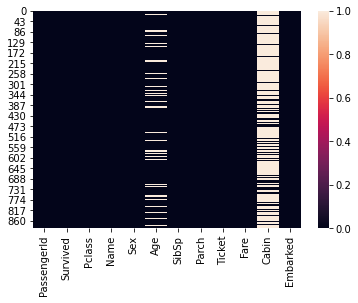

In [494]:
#info about the missing values
df.isnull().sum()

sns.heatmap(df.isnull())
plt.show()

In [495]:
#replacing the missing values
df_ = df

len(df_.Cabin)
df_["Cabin"].value_counts().sort_values()
df_["Cabin"].fillna('S',inplace=True)
df_["Age"].fillna(df_.Age.mean(), inplace=True)




<AxesSubplot:>

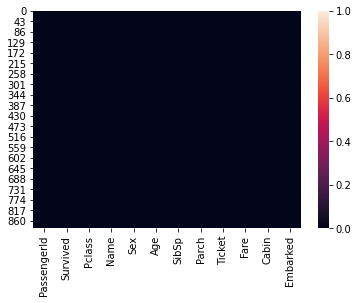

In [496]:
df_.head()
sns.heatmap(df_.isnull())

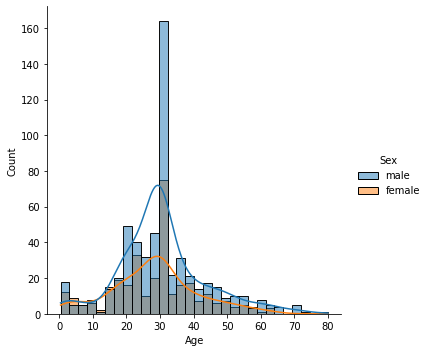

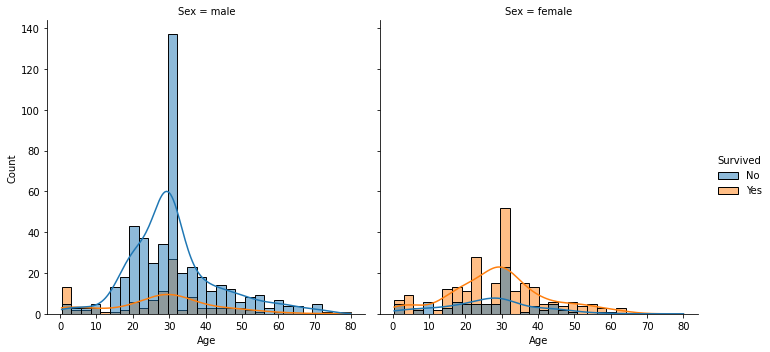

In [497]:
#nmbre de passagers en fonction d'age
sns.displot(data = df_,kde=True,hue = "Sex" ,x = df_.Age)
#nmbre de survivants en fonction d'age par sexe 
sns.displot(data = df_,kde=True,hue = "Survived" ,col="Sex",x = df_.Age)

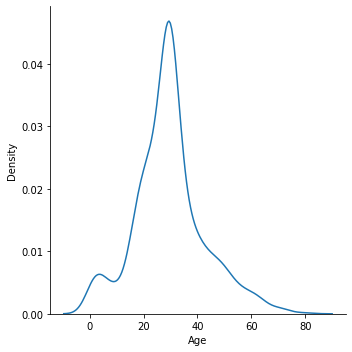

In [498]:
#distribution d'age
sns.displot(df_.Age,kind="kde")

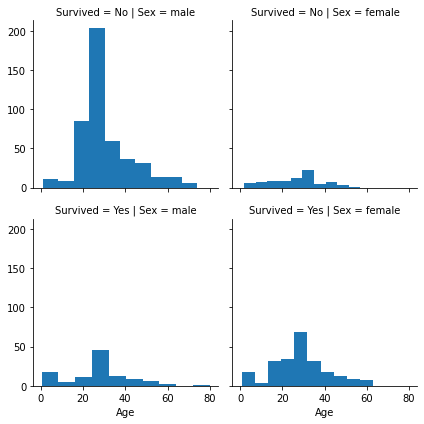

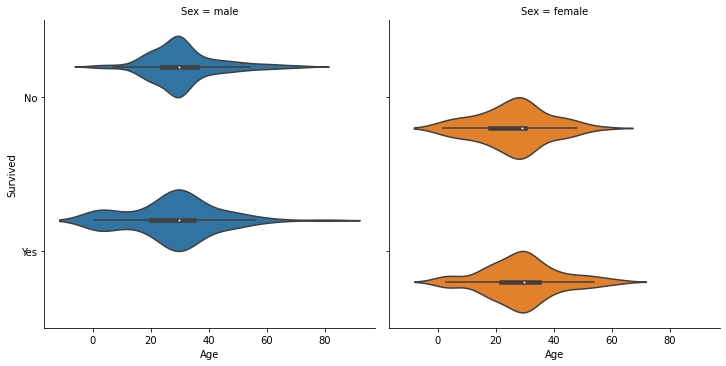

In [499]:
# nbre de passagers selon leur age classifiés par survivant/sexe 
sns.FacetGrid(df_,col="Sex",row="Survived").map(plt.hist,'Age')

sns.catplot(x="Age",y="Survived",col ="Sex" ,hue="Sex",ci = None, kind="violin",data=df_,orient="h")



on remarque que le nombre de survivants est plus important pour la catégorie femme

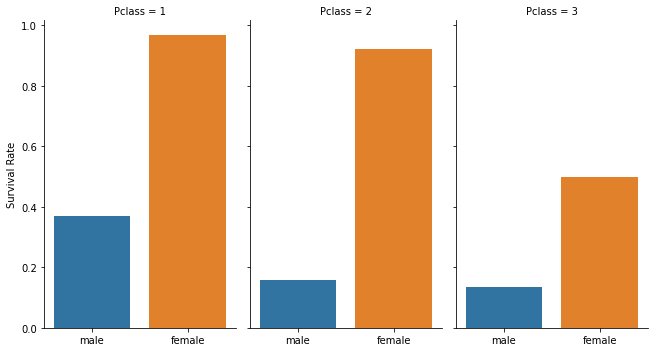

In [500]:
#encoder la var numirique survived 
cat_to_num = { "Survived" : {"Yes" : 1 ,"No" : 0} }
df_.replace(cat_to_num,inplace=True)
#visualisation des survivant selon les classes et le sexe
g = sns.catplot(x="Sex", y="Survived", col="Pclass" ,data=df_, kind="bar", ci=None, aspect=0.6)
g.set_axis_labels("", "Survival Rate")

on remarque que le taux de survivants de la première et deuxième classe est plus élevé par rapport au troisième 
et qu'il est plus important pour la catégorie Femme

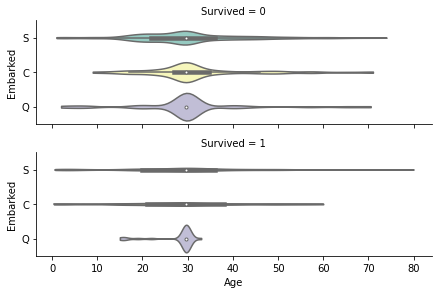

In [501]:
#visualisation les lieux d'embarquement par age et survivant 
g = sns.catplot(x="Age", y="Embarked",row="Survived",
                data=df[df.Embarked.notnull()],
                orient="h", height=2, aspect=3, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2)

In [502]:

df__ = df_
#encodage de cabin (méthode trouvée sur google je voulais garder les indeces)
df__["Cabin"], mapping_index = df_["Cabin"].factorize()
print(list(df__["Cabin"]))
print(mapping_index)



[0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 6, 7, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 10, 11, 0, 0, 12, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 15, 16, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 20, 21, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 22, 23, 24, 25, 0, 0, 0, 0, 0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 0, 0, 0, 28, 0, 0, 0, 29, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 31, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 34, 0, 0, 35, 0, 0, 0, 36, 0, 0, 37, 0, 38, 0, 39, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41, 0, 13, 42, 0, 0, 0, 0, 0, 43, 0, 0, 0, 0, 0, 44, 45, 0, 0, 0, 0, 29, 0, 0, 0, 0, 0, 0, 0, 0, 46, 0, 0, 0, 0, 47, 48, 0, 0, 0, 0, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

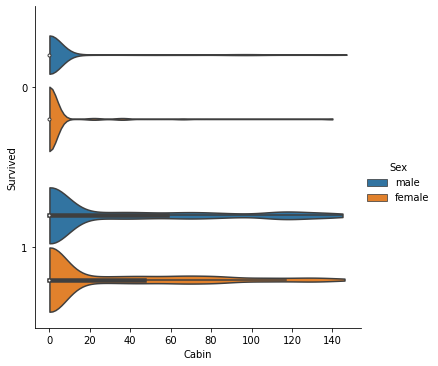

In [503]:
#visualisation des survivants par cabine selon le sexe
g = sns.catplot(x="Cabin", y="Survived",hue="Sex",
                data=df[df.Cabin.notnull()],ci = None,
                orient="h",
                kind="violin", dodge=True, cut=0, bw=.2)

on remarque que les premières cabines selon leurs indices acceuillent plus de passagers ainssi le taux de survivants est plus important

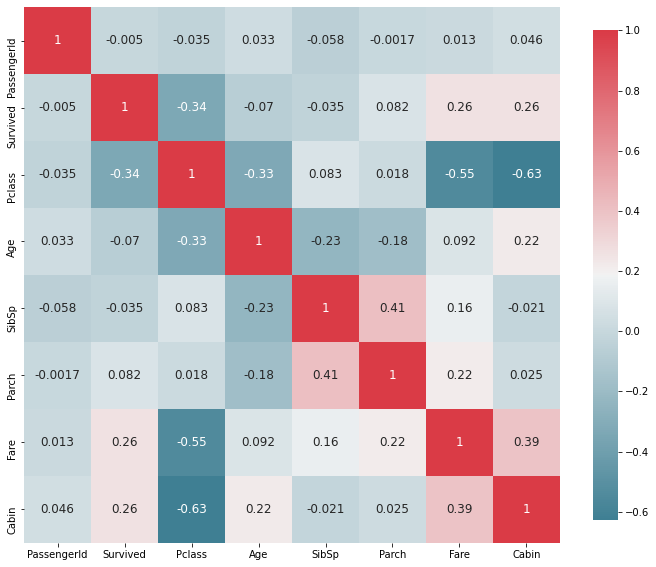

In [504]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

plot_correlation_map(df_)

cette fonction nous montre la correlation entres les attribuets exactement comme corr() mais avec plus d'esthétique
sous forme de heatmap
 < 0 : pas de correlation 
 = 0 : la correlation n'est pas évidente 
 > 0 : correlation entre les deux attributs 

In [505]:
df_.groupby("Pclass").Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

le taux de survivants est plus élevé dans la première classe , moyen dans la deuxième classe et faible dans la troixième

In [506]:
df_.drop("Name", axis= 1 )

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,male,28.000000,0,0,248740,13.0000,0,S
1,76,0,3,male,25.000000,0,0,348123,7.6500,1,S
2,641,0,3,male,20.000000,0,0,350050,7.8542,0,S
3,568,0,3,female,29.000000,0,4,349909,21.0750,0,S
4,672,0,1,male,31.000000,1,0,F.C. 12750,52.0000,2,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,237736,30.0708,0,C
887,61,0,3,male,22.000000,0,0,2669,7.2292,0,C
888,535,0,3,female,30.000000,0,0,315084,8.6625,0,S
889,102,0,3,male,29.699118,0,0,349215,7.8958,0,S


<AxesSubplot:xlabel='Name', ylabel='Age'>

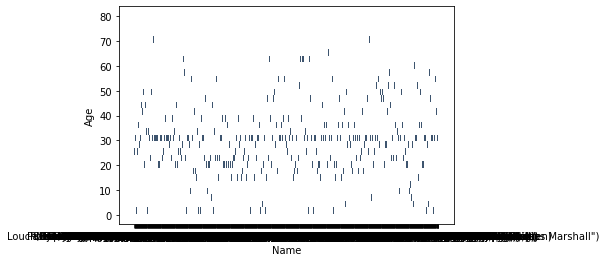

In [507]:
sns.histplot(data = df,y = "Age"  ,x = df.Name )

In [508]:
d=[]
Title_Dictionary = {

"Capt":       "Officer",
"Col":        "Officer",
"Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev" :        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs" ,

                    "Master" :    "Master",

                  }

for k  in df.Name :
  for m in Title_Dictionary.keys() :
    if m+"." in k :
      d.append(Title_Dictionary[m])

df_["Name"] = d

df_.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,Mrs,male,28.000000,0,0,248740,13.0000,0,S
1,76,0,3,Mrs,male,25.000000,0,0,348123,7.6500,1,S
2,641,0,3,Mrs,male,20.000000,0,0,350050,7.8542,0,S
3,568,0,3,Mrs,female,29.000000,0,4,349909,21.0750,0,S
4,672,0,1,Mrs,male,31.000000,1,0,F.C. 12750,52.0000,2,S
5,105,0,3,Mrs,male,37.000000,2,0,3101276,7.9250,0,S
6,576,0,3,Mrs,male,19.000000,0,0,358585,14.5000,0,S
7,382,1,3,Miss,female,1.000000,0,2,2653,15.7417,0,C
8,228,0,3,Mrs,male,20.500000,0,0,A/5 21173,7.2500,0,S
9,433,1,2,Mrs,female,42.000000,1,0,SC/AH 3085,26.0000,0,S


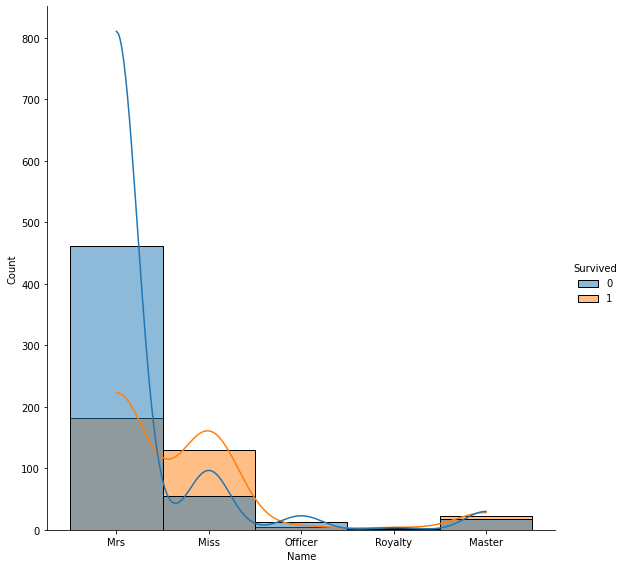

In [509]:
sns.displot(data = df_,hue = "Survived" ,kde = True ,x = df_.Name , height= 8 )

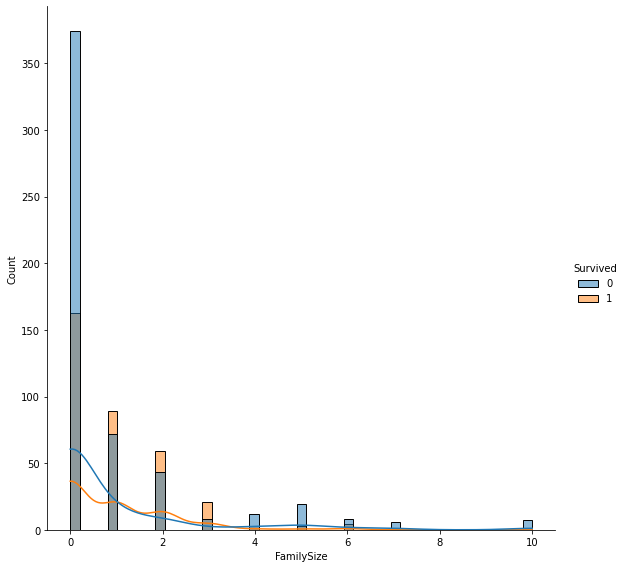

In [514]:
#Number of Siblings/Spouses Aboard; Parch - Number of Parents/Children Aboard
df_["FamilySize"] = df_.SibSp + df_.Parch
sns.displot(data = df_,hue = "Survived" ,kde = True ,x = df_.FamilySize , height= 8 )


elle est utile car elle nous permet d'estimer le nombre de survivats par famille. 